In [47]:
using NearestNeighbors
using StaticArrays
using PGFPlots
import NearestNeighbors: HyperRectangle, compute_bbox, get_min_dim, get_max_dim, get_max_distance, get_min_distance

In [61]:
H = HyperRectangle([1.0,2,3],[4.0,5,6])

NearestNeighbors.HyperRectangle{Float64}([1.0, 2.0, 3.0], [4.0, 5.0, 6.0])

In [140]:
data = [SVector{2,Float64}(rand(2)) for i in 1:20]
bbox = compute_bbox(data)

NearestNeighbors.HyperRectangle{Float64}([0.0979326, 0.0914257], [0.996713, 0.929754])

In [63]:
get_min_dim(bbox, [2.0,3.0], 2),get_max_dim(bbox, [2.0,3.0], 2)

(4.004353132481408, 8.797039635769487)

In [64]:
get_min_distance(bbox, [2.0,3.0]),get_max_distance(bbox, [2.0,3.0])

(5.047123470518562, 12.430084689181186)

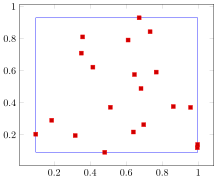

In [141]:
function drawBox(rec::HyperRectangle)
    if length(rec.mins) == 2
        return [
            Plots.Linear([rec.mins[1], rec.mins[1], rec.maxes[1], rec.maxes[1], rec.mins[1]],
                [rec.mins[2],rec.maxes[2],rec.maxes[2],rec.mins[2], rec.mins[2]], mark="none")
        ]
    end
end
elements = drawBox(bbox)
push!(elements, Plots.Linear([pt[1] for pt in data],[pt[2] for pt in data],onlyMarks=true))
Axis(elements)

In [71]:
import NearestNeighbors: TreeData
TreeData(data,3)

NearestNeighbors.TreeData(1, 3, 4, 3, 4, -13, -11, 7)

In [72]:
import NearestNeighbors: find_split

split_idx = 25


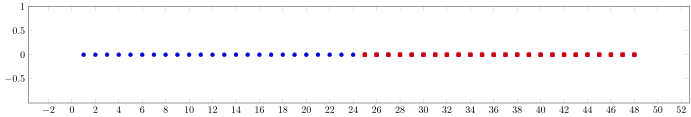

In [106]:
idxs = collect(1:48)
leafsize = 3
low = 1
n_p = length(idxs)
split_idx = find_split(low,leafsize,n_p)
@show split_idx
Axis(
    [
        Plots.Linear(idxs,zeros(size(idxs)),onlyMarks="true"),
        Plots.Linear(collect(split_idx:n_p),zeros(size(collect(split_idx:n_p))),onlyMarks="true"),
    ],width="25cm",height="5cm")

# RTree

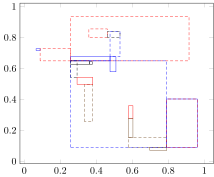

In [148]:
data = [SVector{2,Float64}(rand(2)) for i in 1:20]
dists = Inf*ones(length(data),length(data))
for i in 1:length(data)
    for j in i:length(data)
        if i != j
            dists[i,j] = norm(data[i] - data[j])
        end
    end
end
neighbors = [indmin(dists[i,:]) for i in 1:length(data)]
rectangles = [compute_bbox([data[i],data[neighbors[i]]]) for i in 1:length(data)]
elements = []
for box in [drawBox(rec) for rec in rectangles]
    elements = [elements..., box...]
end
Axis(elements)

In [ ]:
struct RNode{T}
    id::Int
    parent::Int
    children::Set{Int}
    rect::HyperRectangle{T}
end

In [ ]:
struct RTree{T}
    root_id::Int
    nodes::Dict{Int,RNode{T}}
    leaf_size::Int
end

In [ ]:
nodes = Dict()
for (i,c) in enumerate(clusters)
    nodes[i] = RNode(i,0,Set(),HyperRectangle())
end